##**UNDERSTAND THE PROBLEM STATEMENT**

* The objective of this case study is to predict the employee salary based on the number of years of experience.
* In simple linear regression, we predict the value of one variable Y based on another variable X.
* X is called the independent variable and Y is called the dependant variable.
* Why simple? Because it examines relationship between two variables only.
* Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.

## **IMPORT LIBRARIES AND DATASETS**

In [1]:
# !pip install seaborn
# !pip install tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the csv file 
salary_df = pd.read_csv('/content/drive/MyDrive/AWS Sagemaker/1. Employee Salary Prediction/salary.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


##**PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,35.0,6.308571,3.618610,1.1,3.45,5.3,9.25,13.5
Salary,35.0,83945.600000,32162.673003,37731.0,57019.00,81363.0,113223.50,139465.0


In [6]:
salary_df.duplicated().sum()

0

In [7]:
# check if there are any Null values
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary_df.isnull().values.any()

False

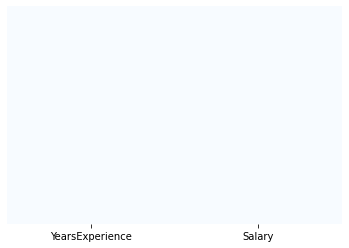

In [9]:
# check if there are any Null values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

**What are the number of years of experience corresponding to employees with minimum and maximim salaries?**

In [10]:
salary_df.max()

YearsExperience        13.5
Salary             139465.0
dtype: float64

In [11]:
salary_df.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

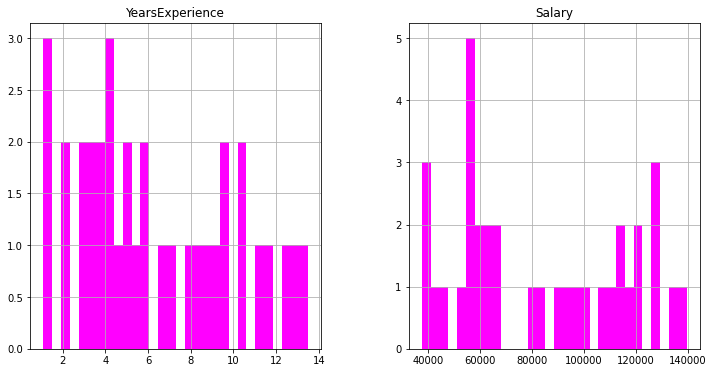

In [12]:
salary_df.hist(bins = 30, figsize = (12,6), color = 'magenta');

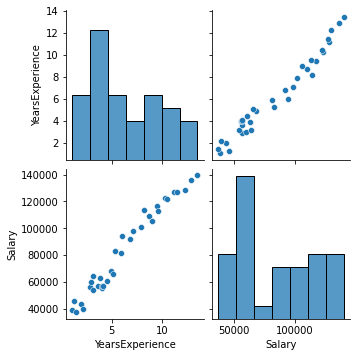

In [13]:
# plot pairplot

sns.pairplot(salary_df);

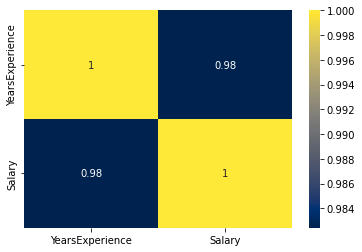

In [14]:
sns.heatmap(salary_df.corr(), annot = True, cmap = 'cividis')
plt.show();

Use regplot in Seaborn to obtain a straight line fit between "salary" and "years of experience"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


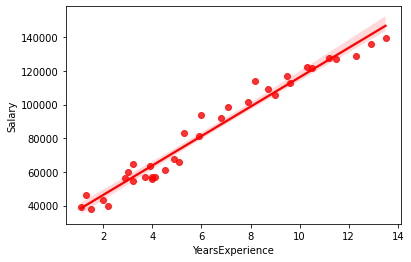

In [15]:
sns.regplot('YearsExperience' , 'Salary', salary_df, color = 'r');

## **CREATE TRAINING AND TESTING DATASET**

In [16]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]

In [17]:
X.shape

(35, 1)

In [18]:
y.shape

(35, 1)

In [19]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##**TRAIN A LINEAR REGRESSION MODEL IN SK-LEARN**

In [20]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
regressor_accuracy = regressor.score(X_test, y_test)
print('Linear Model accuracy: ', regressor_accuracy)
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model accuracy:  0.9344760779080654
Linear Model Coefficient (m):  [[8806.57699968]]
Linear Model Coefficient (b):  [27873.41296638]


Retrain the model while setting the fit_intercept = False, what do you notice?

In [22]:
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, y_train)
regressor_accuracy = regressor.score(X_test, y_test)
print('Linear Model accuracy: ', regressor_accuracy)
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model accuracy:  0.6348564078504803
Linear Model Coefficient (m):  [[12111.49383573]]
Linear Model Coefficient (b):  0.0


##**EVALUATE TRAINED MODEL PERFORMANCE**

In [23]:
y_predict = regressor.predict(X_test)
y_predict

array([[ 13322.64321931],
       [ 38756.78027435],
       [ 99314.24945301],
       [ 47234.82595936],
       [148971.37417952],
       [ 48445.97534293],
       [ 85991.6062337 ]])

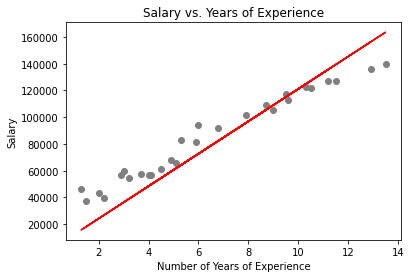

In [24]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience');

Use the trained model, obtain the salary corresponding to eployees who have years of experience = 5

In [25]:
X_test_new = [[5]]

In [26]:
y_predict = regressor.predict(X_test_new)
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[60557.46917867]])